# IMPORTING LIBRARIES

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import re
from collections import namedtuple, Counter
from wordcloud import WordCloud

from sklearn.feature_extraction.text import CountVectorizer

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

# Steps Involved
    1. Loading Data
    2. Data Cleaning
    3. EDA
    4. Text Preprocessing
    5. Model Building

# Loading Data

In [2]:
Covid_test_data = pd.read_csv("../input/covid-19-nlp-text-classification/Corona_NLP_test.csv")
Covid_train_data = pd.read_csv("../input/covid-19-nlp-text-classification/Corona_NLP_train.csv",  encoding='latin-1')

In [3]:
Covid_test_data.sample(4)

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
2716,2717,47669,UK,14-03-2020,We've seen how a crisis can often bring out th...,Extremely Positive
541,542,45494,They/Them She/Her,12-03-2020,Working at a grocery store in the U.S. during ...,Negative
1247,1248,46200,"Dublin, Ireland",13-03-2020,@GoldenDiscs I just made my first purchase on ...,Neutral
2966,2967,47919,Toronto,15-03-2020,Corporate Canada weighs force majeure clauses ...,Positive


**Only intrested in the OriginalTweet and Sentiment Columns**

In [4]:
test_data = Covid_test_data[['OriginalTweet','Sentiment']]

In [5]:
train_data = Covid_train_data[['OriginalTweet','Sentiment']]

# **Data Cleaning**

In [6]:
#checking for null values

train_data.sum().isna()

OriginalTweet    False
Sentiment        False
dtype: bool

In [7]:
train_data.rename(columns ={"OriginalTweet":"Tweets"},inplace = True)
test_data.rename(columns ={"OriginalTweet":"Tweets"},inplace = True)

/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [8]:
print("Number of rows in data =",train_data.shape[0])
print("Number of columns in data =",train_data.shape[1])
print("\n")
print('\033[1m' + 'Sample Train_Data :' + '\033[0m')
train_data.head()

Number of rows in data = 41157
Number of columns in data = 2


Sample Train_Data :


,Tweets,Sentiment
0,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,advice Talk to your neighbours family to excha...,Positive
2,Coronavirus Australia: Woolworths to give elde...,Positive
3,My food stock is not the only one which is emp...,Positive
4,"Me, ready to go at supermarket during the #COV...",Extremely Negative


In [9]:
print("Number of rows in data =",test_data.shape[0])
print("Number of columns in data =",test_data.shape[1])
print("\n")
print('\033[1m' + 'Sample Test_Data :' + '\033[0m')
test_data.head()

Number of rows in data = 3798
Number of columns in data = 2


Sample Test_Data :


,Tweets,Sentiment
0,TRENDING: New Yorkers encounter empty supermar...,Extremely Negative
1,When I couldn't find hand sanitizer at Fred Me...,Positive
2,Find out how you can protect yourself and love...,Extremely Positive
3,#Panic buying hits #NewYork City as anxious sh...,Negative
4,#toiletpaper #dunnypaper #coronavirus #coronav...,Neutral


 ONE HOT ENCODING

In [10]:
label = pd.get_dummies(train_data['Sentiment'])

In [11]:
train_df = train_data.join(label)
train_df

,Tweets,Sentiment,Extremely Negative,Extremely Positive,Negative,Neutral,Positive
0,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,0,0,0,1,0
1,advice Talk to your neighbours family to excha...,Positive,0,0,0,0,1
2,Coronavirus Australia: Woolworths to give elde...,Positive,0,0,0,0,1
3,My food stock is not the only one which is emp...,Positive,0,0,0,0,1
4,"Me, ready to go at supermarket during the #COV...",Extremely Negative,1,0,0,0,0
...,...,...,...,...,...,...,...
41152,Airline pilots offering to stock supermarket s...,Neutral,0,0,0,1,0
41153,Response to complaint not provided citing COVI...,Extremely Negative,1,0,0,0,0
41154,You know itÂs getting tough when @KameronWild...,Positive,0,0,0,0,1
41155,Is it wrong that the smell of hand sanitizer i...,Neutral,0,0,0,1,0


In [12]:
train_df = train_df[['Tweets','Positive','Extremely Positive','Neutral','Negative','Extremely Negative']]
train_df

,Tweets,Positive,Extremely Positive,Neutral,Negative,Extremely Negative
0,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,0,0,1,0,0
1,advice Talk to your neighbours family to excha...,1,0,0,0,0
2,Coronavirus Australia: Woolworths to give elde...,1,0,0,0,0
3,My food stock is not the only one which is emp...,1,0,0,0,0
4,"Me, ready to go at supermarket during the #COV...",0,0,0,0,1
...,...,...,...,...,...,...
41152,Airline pilots offering to stock supermarket s...,0,0,1,0,0
41153,Response to complaint not provided citing COVI...,0,0,0,0,1
41154,You know itÂs getting tough when @KameronWild...,1,0,0,0,0
41155,Is it wrong that the smell of hand sanitizer i...,0,0,1,0,0


# EXPLORATORY DATA ANALYSIS

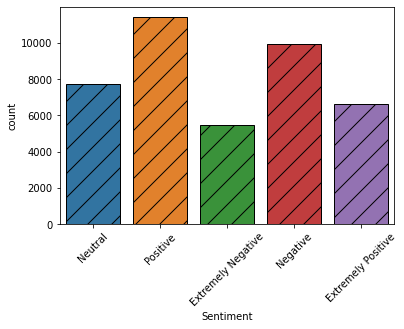

In [13]:
sns.countplot(x = 'Sentiment', data = train_data,lw = 1, ec = 'black', hatch = '/')
plt.xticks(rotation = 45);

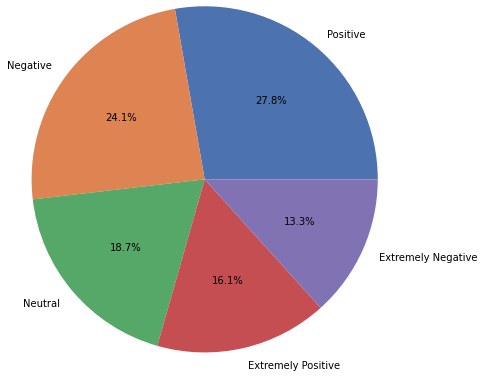

In [14]:
label = ['Positive', 'Negative', 'Neutral', 'Extremely Positive', 'Extremely Negative']
data = [11422, 9917, 7713, 6624, 5481] 

colors = sns.color_palette('deep')[0:5]
plt.pie(data, labels = label, autopct = '%1.1f%%', colors = colors, radius =1.99);

In [15]:
# MERGING 5 COLOUMNS 
train_data = train_data.replace("Extremely Negative","Negative")
test_data = test_data.replace("Extremely Negative","Negative")

train_data = train_data.replace("Extremely Positive","Positive")
test_data = test_data.replace("Extremely Positive","Positive")

In [16]:
# LABELING THE 3 CLASSES as (0,1,2)
labelencoder = LabelEncoder()

train_data['Label'] = labelencoder.fit_transform(train_data['Sentiment'])
test_data['Label'] = labelencoder.transform(test_data['Sentiment'])

   Sentiment       Label

1. Neutral           1
2. Positive          2
3. Negative          0

# Text Preprocessing

In [17]:
def clean_text(txt):
    corpus = []
    for i in range(len(txt)):
        #remove URLs
        T1 = re.sub(r'http\S+', ' ', txt['Tweets'][i])
        #remove html tags
        T2 = re.sub(r'<.*?>',' ', T1) 
        #remove digits
        T3 = re.sub(r'\d+',' ', T2)
        #remove hashtags
        T4 = re.sub(r'#\w+',' ', T3)
        review = re.sub('[^a-zA-Z]', ' ', T4)
        review = review.lower()
        review = review.split()
        review = ' '.join(review)
        corpus.append(review)
    return corpus
        

In [18]:
# Storing the clean data into a new column as (Clean_Text)
train_data['Clean_text'] = clean_text(train_data)
test_data['Clean_Text'] = clean_text(test_data)

In [19]:
train_data

,Tweets,Sentiment,Label,Clean_text
0,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,1,menyrbie phil gahan chrisitv and and
1,advice Talk to your neighbours family to excha...,Positive,2,advice talk to your neighbours family to excha...
2,Coronavirus Australia: Woolworths to give elde...,Positive,2,coronavirus australia woolworths to give elder...
3,My food stock is not the only one which is emp...,Positive,2,my food stock is not the only one which is emp...
4,"Me, ready to go at supermarket during the #COV...",Negative,0,me ready to go at supermarket during the outbr...
...,...,...,...,...
41152,Airline pilots offering to stock supermarket s...,Neutral,1,airline pilots offering to stock supermarket s...
41153,Response to complaint not provided citing COVI...,Negative,0,response to complaint not provided citing covi...
41154,You know itÂs getting tough when @KameronWild...,Positive,2,you know it s getting tough when kameronwilds ...
41155,Is it wrong that the smell of hand sanitizer i...,Neutral,1,is it wrong that the smell of hand sanitizer i...


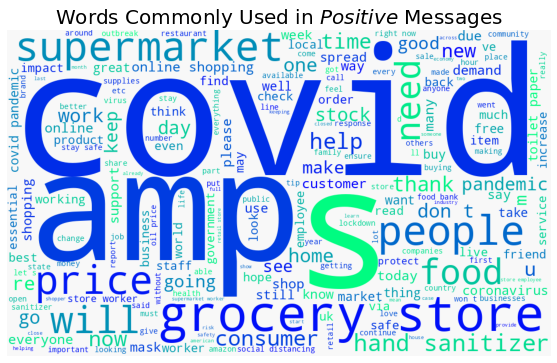

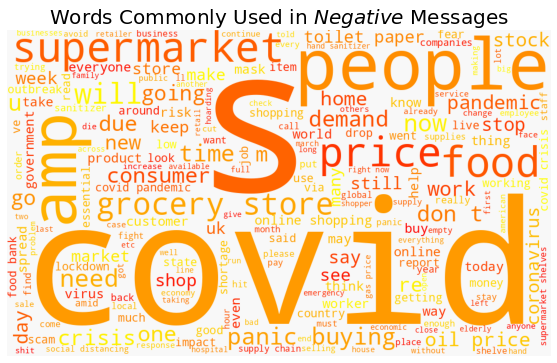

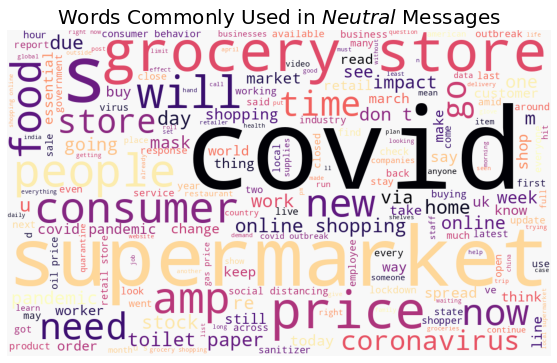

In [20]:
#Using WordCloud for 3 classes
for label, cmap in zip(['Positive', 'Negative', 'Neutral'],
                       ['winter', 'autumn', 'magma',]):
    text = train_data.query('Sentiment == @label')['Clean_text'].str.cat(sep=' ')
    plt.figure(figsize=(10, 6))
    wc = WordCloud(width=1000, height=600, background_color="#f8f8f8", colormap=cmap)
    wc.generate_from_text(text)
    plt.imshow(wc)
    plt.axis("off")
    plt.title(f"Words Commonly Used in ${label}$ Messages", size=20)

In [21]:
train_data

,Tweets,Sentiment,Label,Clean_text
0,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,1,menyrbie phil gahan chrisitv and and
1,advice Talk to your neighbours family to excha...,Positive,2,advice talk to your neighbours family to excha...
2,Coronavirus Australia: Woolworths to give elde...,Positive,2,coronavirus australia woolworths to give elder...
3,My food stock is not the only one which is emp...,Positive,2,my food stock is not the only one which is emp...
4,"Me, ready to go at supermarket during the #COV...",Negative,0,me ready to go at supermarket during the outbr...
...,...,...,...,...
41152,Airline pilots offering to stock supermarket s...,Neutral,1,airline pilots offering to stock supermarket s...
41153,Response to complaint not provided citing COVI...,Negative,0,response to complaint not provided citing covi...
41154,You know itÂs getting tough when @KameronWild...,Positive,2,you know it s getting tough when kameronwilds ...
41155,Is it wrong that the smell of hand sanitizer i...,Neutral,1,is it wrong that the smell of hand sanitizer i...


In [22]:
#Using vectoring method 
cv = CountVectorizer(max_features=10000) #You will get 31750 columns if you dont specify max_features
X_train = cv.fit_transform(train_data["Clean_text"]).toarray()
y_train = train_data['Label']
X_test = cv.transform(test_data["Clean_Text"]).toarray()
y_test = test_data['Label']

In [23]:
#checking the split_data
X_test

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

# Building Model

              precision    recall  f1-score   support

           0       0.72      0.77      0.74      1633
           1       0.61      0.44      0.51       619
           2       0.72      0.74      0.73      1546

    accuracy                           0.71      3798
   macro avg       0.68      0.65      0.66      3798
weighted avg       0.70      0.71      0.70      3798


Confusion Matrix: 
 [[1255   96  282]
 [ 174  275  170]
 [ 317   81 1148]]
Accuracy: 
 0.7051079515534492


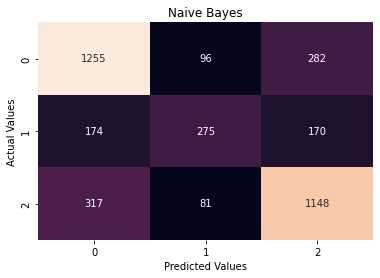

In [24]:
#Naive Bayse
classifier = MultinomialNB().fit(X_train, y_train)
pred = classifier.predict(X_test)
print(classification_report(y_test, pred))
print()
print("Confusion Matrix: \n", confusion_matrix(y_test, pred))
print("Accuracy: \n", accuracy_score(y_test, pred))
sns.heatmap(confusion_matrix(y_test, pred), annot=True, fmt='g', cbar=False)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Naive Bayes')
plt.show()

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


              precision    recall  f1-score   support

           0       0.87      0.83      0.85      1633
           1       0.75      0.77      0.76       619
           2       0.83      0.87      0.85      1546

    accuracy                           0.83      3798
   macro avg       0.82      0.82      0.82      3798
weighted avg       0.84      0.83      0.83      3798


Confusion Matrix: 
 [[1349   89  195]
 [  67  477   75]
 [ 133   71 1342]]
Accuracy: 
 0.8341232227488151


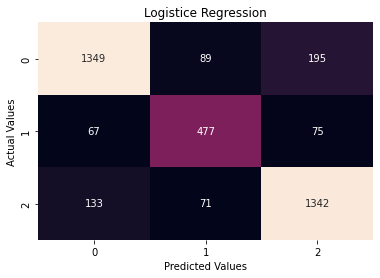

In [25]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
Y_pred = logreg.predict(X_test)

print(classification_report(y_test, Y_pred))
print()
print("Confusion Matrix: \n", confusion_matrix(y_test, Y_pred))
print("Accuracy: \n", accuracy_score(y_test, Y_pred))
sns.heatmap(confusion_matrix(y_test, Y_pred), annot=True, fmt='g', cbar=False)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Logistice Regression')
plt.show()